# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        positions[0][:]= self.pos
        for i in range(1,n+1):
            positions[i][:] = positions[i-1][:] + walker.pickStep(self)
        return positions


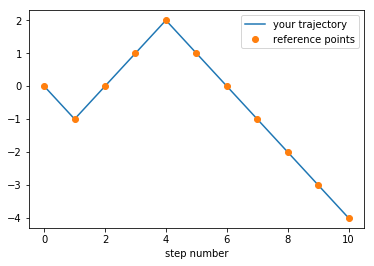

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

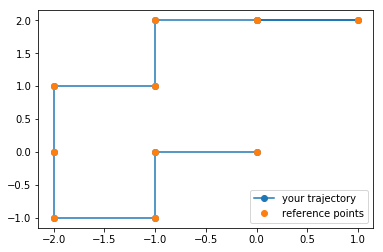

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

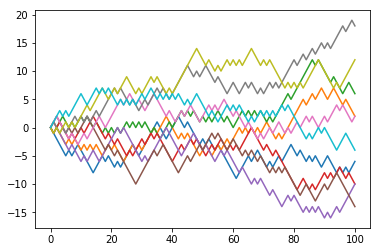

In [25]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


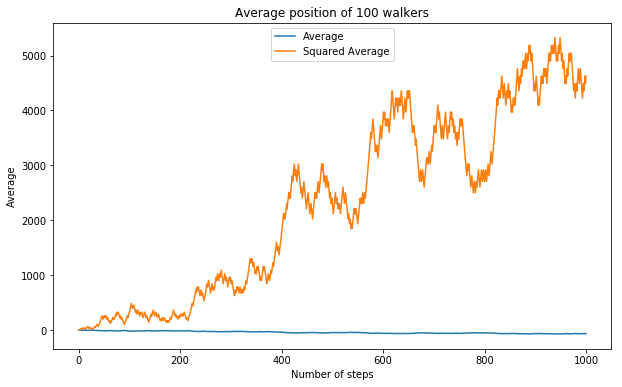

In [47]:
nsteps = 1000
ndim = 1
nwalkers = 100
w = walker([0])
xs = range(0,nsteps+1)
data = w.doSteps(nsteps)

for i in range(1,nwalkers):
    numpy.concatenate((data, w.doSteps(nsteps)), axis=1);

Average = numpy.mean(data, axis=1)
SquAverage = numpy.mean(numpy.square(data),axis=1)

plt.figure(figsize=(10, 6))
plt.plot(xs,Average,label='Average')
plt.plot(xs,SquAverage,label='Squared Average')

plt.xlabel('Number of steps')
plt.ylabel("Average")
plt.title("Average position of 100 walkers")
plt.legend(loc='upper center')


**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


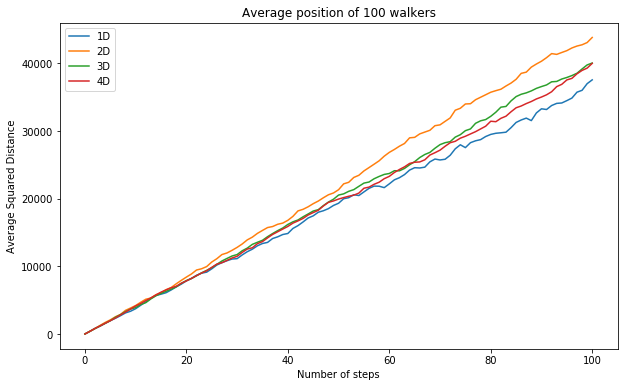

In [67]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

xs = range(0,nsteps+1)
plt.figure(figsize=(10, 6))

for d in dimensions:
    w = walker(numpy.zeros(d),ndim=d)
    ys = numpy.square(w.doSteps(nsteps))
    for i in range(1,nwalkers):
        ys = ys + numpy.square(w.doSteps(nsteps,));
    SquAverage = numpy.sum(ys,axis=1)
    plt.plot(xs,SquAverage,label=str(d)+'D');
    
plt.xlabel('Number of steps')
plt.ylabel("Average Squared Distance")
plt.title("Average position of 100 walkers")
plt.legend(loc='upper left')

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


[[0.9814067  0.9193032 ]
 [0.9814067  0.86930317]
 [0.9314067  0.86930317]
 [0.9314067  0.9193032 ]
 [0.9814067  0.9193032 ]
 [0.9814067  0.86930317]
 [0.9814067  0.9193032 ]
 [1.0314066  0.9193032 ]
 [0.9814066  0.9193032 ]
 [0.9814066  0.9693032 ]
 [0.9314066  0.9693032 ]]
[[0.9330296  0.5370366 ]
 [0.9830296  0.5370366 ]
 [0.9830296  0.5870366 ]
 [0.9330296  0.5870366 ]
 [0.9330296  0.6370366 ]
 [0.8830296  0.6370366 ]
 [0.9330296  0.6370366 ]
 [0.9330296  0.68703663]
 [0.9330296  0.6370366 ]
 [0.9330296  0.68703663]
 [0.8830296  0.68703663]]
[[0.90210783 0.25114614]
 [0.90210783 0.30114615]
 [0.95210785 0.30114615]
 [0.95210785 0.35114616]
 [0.90210783 0.35114616]
 [0.90210783 0.30114615]
 [0.90210783 0.25114614]
 [0.8521078  0.25114614]
 [0.8521078  0.20114614]
 [0.8021078  0.20114614]
 [0.7521078  0.20114614]]
[[0.27835622 0.11431221]
 [0.32835624 0.11431221]
 [0.32835624 0.16431221]
 [0.27835622 0.16431221]
 [0.27835622 0.21431221]
 [0.32835624 0.21431221]
 [0.27835622 0.2143122

[[0.6998722  0.11333729]
 [0.6998722  0.16333729]
 [0.6998722  0.21333729]
 [0.6998722  0.26333728]
 [0.6498722  0.26333728]
 [0.6998722  0.26333728]
 [0.6998722  0.21333729]
 [0.7498722  0.21333729]
 [0.7498722  0.26333728]
 [0.6998722  0.26333728]
 [0.6498722  0.26333728]
 [0.5998722  0.26333728]
 [0.54987216 0.26333728]
 [0.49987215 0.26333728]
 [0.44987214 0.26333728]
 [0.49987215 0.26333728]
 [0.54987216 0.26333728]
 [0.54987216 0.3133373 ]
 [0.49987215 0.3133373 ]
 [0.54987216 0.3133373 ]
 [0.54987216 0.26333728]
 [0.54987216 0.21333729]
 [0.5998722  0.21333729]
 [0.6498722  0.21333729]
 [0.6498722  0.26333728]
 [0.6998722  0.26333728]
 [0.6998722  0.21333729]
 [0.7498722  0.21333729]
 [0.6998722  0.21333729]
 [0.7498722  0.21333729]
 [0.6998722  0.21333729]
 [0.7498722  0.21333729]
 [0.6998722  0.21333729]
 [0.6998722  0.26333728]
 [0.7498722  0.26333728]
 [0.6998722  0.26333728]
 [0.7498722  0.26333728]
 [0.7498722  0.21333729]
 [0.7498722  0.26333728]
 [0.6998722  0.26333728]


[[ 0.09585357  0.90271723]
 [ 0.09585357  0.8527172 ]
 [ 0.14585356  0.8527172 ]
 ...
 [-0.20414643  0.7027172 ]
 [-0.20414643  0.6527172 ]
 [-0.20414643  0.60271716]]
[[ 0.51356995  0.48337537]
 [ 0.46356994  0.48337537]
 [ 0.41356993  0.48337537]
 ...
 [ 0.56356996 -1.2666246 ]
 [ 0.61357    -1.2666246 ]
 [ 0.66357    -1.2666246 ]]
[[ 0.55934584  0.05796801]
 [ 0.60934585  0.05796801]
 [ 0.60934585  0.00796801]
 ...
 [ 0.8093459  -1.8920313 ]
 [ 0.7593459  -1.8920313 ]
 [ 0.7593459  -1.9420313 ]]
[[0.26584214 0.29298228]
 [0.21584214 0.29298228]
 [0.16584215 0.29298228]
 ...
 [0.8158423  0.3429823 ]
 [0.8158423  0.3929823 ]
 [0.8158423  0.44298232]]
[[ 0.43984786  0.49428815]
 [ 0.43984786  0.44428813]
 [ 0.48984787  0.44428813]
 ...
 [-0.56015223 -0.00571189]
 [-0.56015223  0.04428811]
 [-0.56015223  0.09428811]]
[[ 0.25507697  0.4644176 ]
 [ 0.20507698  0.4644176 ]
 [ 0.25507697  0.4644176 ]
 ...
 [-1.5949227   0.61441755]
 [-1.5449227   0.61441755]
 [-1.5449227   0.66441756]]
[[ 0

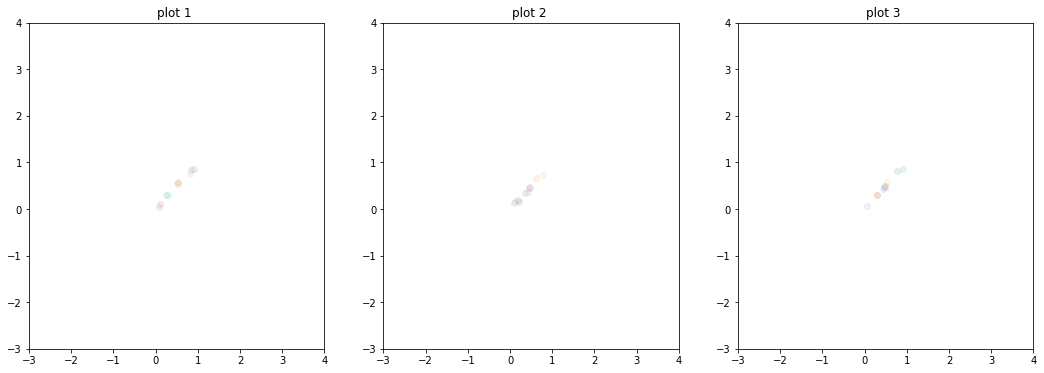

In [87]:
ndim=2
nwalkers=10

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    for k in range(0,nwalkers):
        startpos = numpy.random.uniform(size=(1, 2))
        w = walker(startpos, ndim=ndim,step_size=0.05)
        data = w.doSteps(nsteps)
        print(data)
        plt.scatter(data[0,-1],data[1,-1],alpha=0.1)
    
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    #plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)

